In [7]:
%load_ext pretty_jupyter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
from pretty_jupyter.helpers import matplotlib_fig_to_markdown

sns.set_theme()

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


In [8]:
%%jmd

# Algorithm
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.


# Algorithm
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills|O_O|.tabset-fade</span>

Sometimes we want to create tabsets dynamically, meaning we want to generate them based on a code.
Pretty Jupyter supports this by using Jinja Markdown cells.

In [9]:
# create dataframe
data = pd.DataFrame({"a": [1, 2, 3, 4], "b": [4, 3, 2, 1], "c": [1, 4, 2, 3]})




## Tabset for column a



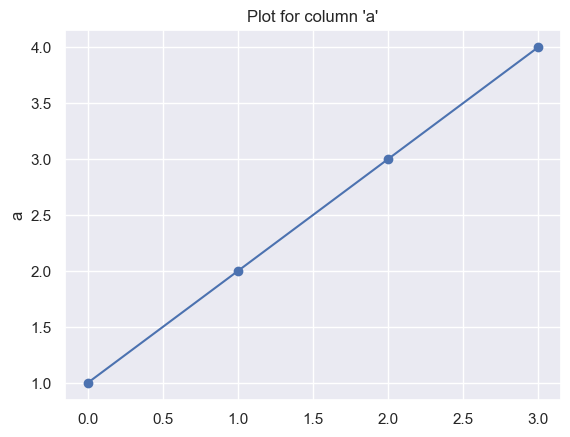



## Tabset for column b



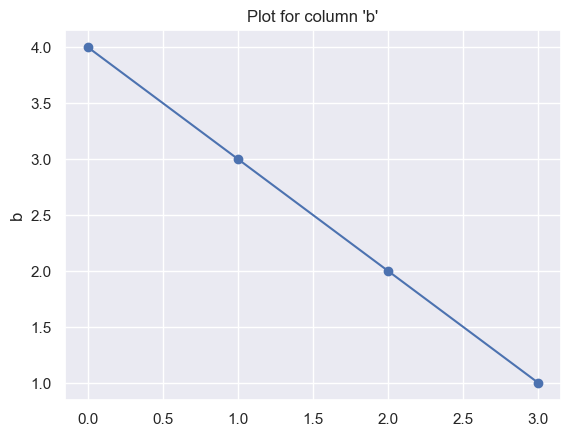



## Tabset for column c



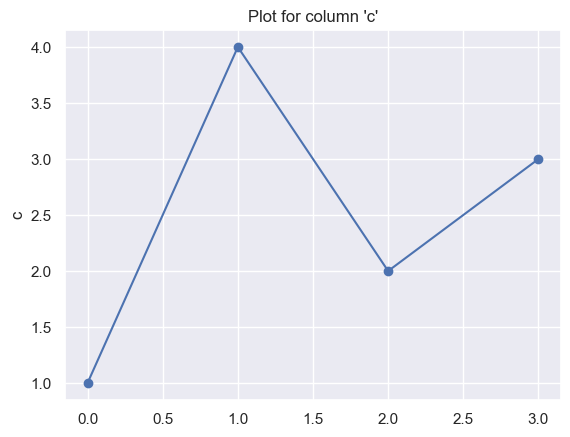


In [10]:
%%jmd

{% for col in data.columns %}

## Tabset for column {{ col }}

{% set obj = plt.subplots() %}
{% set _ = so.Plot(x=np.arange(data.shape[0]), y=data[col]).add(so.Line(marker="o")).label(title="Plot for column '{}'".format(col), y=col).on(obj[1]).plot() %}
{{ matplotlib_fig_to_markdown(obj[0]) }}

{% endfor %}

Each Jinja Markdown cell is internally ran through Jinja templating framework. To read more about Jinja, check out its [documentation](https://jinja.palletsprojects.com/).

# Alternative Method
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

There is an alternative method how to do it. If we don't want to work in jinja, we can use pure python for the cycle. We can use `Markdown` class for that.

Note that inside `Markdown` class we cannot use tokens (such as .tabset etc).

[//]: # (-.- .alert .alert-warning)

This method is, however, sometimes useful, if our loop is more code-heavy than markdown-heavy.

## Tabset for column a

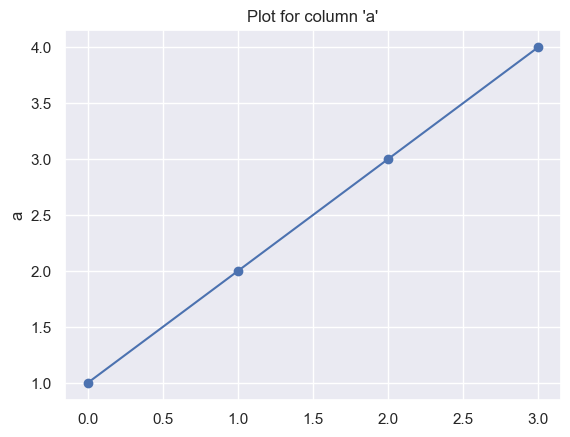

## Tabset for column b

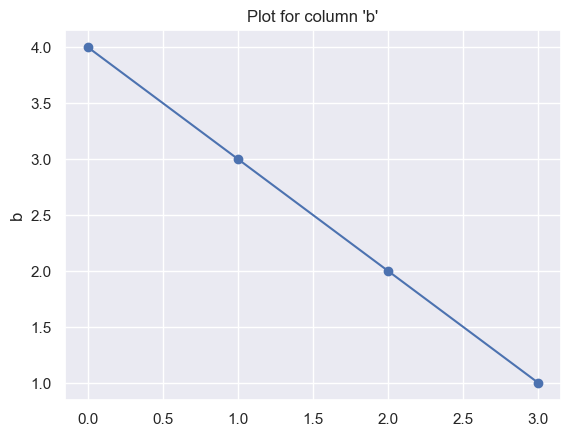

## Tabset for column c

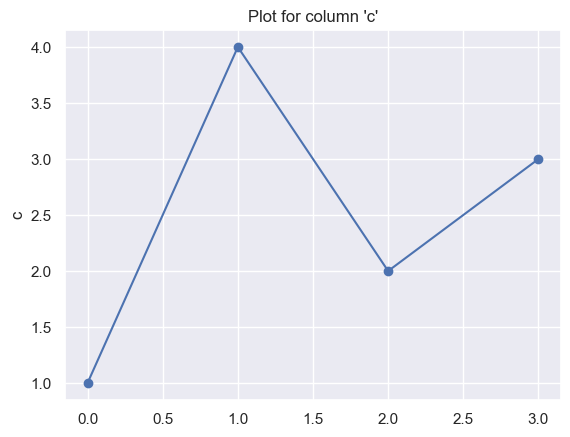

In [11]:
from IPython.display import display, Markdown

for col in data.columns:
    display(Markdown(f"## Tabset for column {col}"))

    fig, ax = plt.subplots()
    so.Plot(x=np.arange(data.shape[0]), y=data[col]).add(so.Line(marker="o")).label(title="Plot for column '{}'".format(col), y=col).on(ax).plot()
    display(Markdown(matplotlib_fig_to_markdown(ax.figure)))